In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
from matplotlib import cm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score

In [2]:
#loading data into data frame
data = pd.read_csv('SpotifyFeatures.csv')
data.head()

genre      artist_name                                         track_name  \
0  Opera   Giuseppe Verdi  Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1  Opera  Giacomo Puccini  Madama Butterfly / Act 1: ... E soffitto e pareti   
2  Opera  Giacomo Puccini      Turandot / Act 2: Gloria, gloria, o vincitore   
3  Opera   Giuseppe Verdi       Rigoletto, Act IV: Venti scudi hai tu detto?   
4  Opera   Giuseppe Verdi           Don Carlo / Act 4: "Ella giammai m'amò!"   

                 track_id  popularity  acousticness  danceability  \
0  7EsKYeHtTc4H4xWiTqSVZA          21         0.986         0.313   
1  7MfmRBvqaW0I6UTxXnad8p          18         0.972         0.360   
2  7pBo1GDhIysyUMFXiDVoON          10         0.935         0.168   
3  02mvYZX5aKNzdqEo6jF20m          17         0.961         0.250   
4  03TW0jwGMGhUabAjOpB1T9          19         0.985         0.142   

   duration_ms   energy  instrumentalness key  liveness  loudness   mode  \
0       490867  0.23100          0.000431  C#    0.0964   -14.287  Major   
1       176797  0.20100          0.028000  D#    0.1330   -19.794  Major   
2       266184  0.47000          0.020400   C    0.3630    -8.415  Major   
3       288573  0.00605          0.000000   D    0.1200   -33.440  Major   
4       629760  0.05800          0.146000   D    0.0969   -23.625  Major   

   speechiness    tempo time_signature  valence  
0       0.0547   86.001            4/4   0.0886  
1       0.0581  131.798            4/4   0.3690  
2       0.0383   75.126            3/4   0.0696  
3       0.0480   76.493            4/4   0.0380  
4       0.0493  172.935            4/4   0.0382

In [3]:
data.genre.unique()


array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

In [4]:
data.artist_name.unique()

array(['Giuseppe Verdi', 'Giacomo Puccini', 'Georges Bizet', ...,
       'Ryan Amon', 'Mychael Danna & Jeff Danna', 'Pino Donaggio'],
      dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228159 entries, 0 to 228158
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             228159 non-null  object 
 1   artist_name       228159 non-null  object 
 2   track_name        228159 non-null  object 
 3   track_id          228159 non-null  object 
 4   popularity        228159 non-null  int64  
 5   acousticness      228159 non-null  float64
 6   danceability      228159 non-null  float64
 7   duration_ms       228159 non-null  int64  
 8   energy            228159 non-null  float64
 9   instrumentalness  228159 non-null  float64
 10  key               228159 non-null  object 
 11  liveness          228159 non-null  float64
 12  loudness          228159 non-null  float64
 13  mode              228159 non-null  object 
 14  speechiness       228159 non-null  float64
 15  tempo             228159 non-null  float64
 16  time_signature    22

In [6]:
data.describe()

popularity   acousticness   danceability   duration_ms  \
count  228159.000000  228159.000000  228159.000000  2.281590e+05   
mean       44.209130       0.351200       0.554198  2.366092e+05   
std        17.276599       0.351385       0.183949  1.166787e+05   
min         0.000000       0.000001       0.056900  1.550900e+04   
25%        33.000000       0.030900       0.437000  1.862530e+05   
50%        47.000000       0.205000       0.570000  2.211730e+05   
75%        57.000000       0.689000       0.690000  2.648400e+05   
max       100.000000       0.996000       0.987000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  228159.000000     228159.000000  228159.000000  228159.000000   
mean        0.580967          0.137310       0.214638      -9.354658   
std         0.260577          0.292447       0.196977       5.940994   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.405000          0.000000       0.097700     -11.287000   
50%         0.618000          0.000037       0.128000      -7.515000   
75%         0.793000          0.023400       0.263000      -5.415000   
max         0.999000          0.999000       1.000000       1.585000   

         speechiness          tempo        valence  
count  228159.000000  228159.000000  228159.000000  
mean        0.122442     117.423062       0.444795  
std         0.186264      30.712458       0.255397  
min         0.022200      30.379000       0.000000  
25%         0.036800      92.734000       0.232000  
50%         0.050600     115.347000       0.430000  
75%         0.109000     138.887000       0.643000  
max         0.967000     239.848000       1.000000

In [7]:
#checking for null values
data.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [8]:
#replacing special charaters
col = ['artist_name']
for i in col:
#     print(i.str.replace("$$","ss"))
    data[i] = data[i].str.replace('[$,]', '')
data[data['artist_name']=='PUEIDXN']

<ipython-input-8-158be4af8373>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data[i] = data[i].str.replace('[$,]', '')


genre artist_name                 track_name                track_id  \
173811  Soul     PUEIDXN                 PLOT TWIST  16L5MRq8ZZ2b9WYUOLkkOm   
174442  Soul     PUEIDXN  How to Get Your Girl Back  0lu5Irhoh5R1CCnz6mviWD   
190887  Soul     PUEIDXN     It Could Happen to You  0y0EVlku6rKpGpRmGy9cM0   
192480  Soul     PUEIDXN                Need It All  12q3ZBe5GIG6SVaMo7gM8I   

        popularity  acousticness  danceability  duration_ms  energy  \
173811          51       0.00977         0.813       201718   0.619   
174442          48       0.77400         0.728       319223   0.354   
190887          36       0.56900         0.640       196992   0.535   
192480          34       0.58900         0.732       224304   0.449   

        instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
173811          0.000001  A#    0.0825    -6.615  Minor       0.0385  119.017   
174442          0.011600   F    0.1320   -11.710  Minor       0.0287  103.102   
190887          0.000053   G    0.1170    -9.756  Major       0.0703  110.430   
192480          0.000000   C    0.1770   -10.634  Minor       0.0411  122.073   

       time_signature  valence  
173811            4/4    0.181  
174442            4/4    0.212  
190887            3/4    0.551  
192480            4/4    0.427

In [9]:
data.corr()

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.422083      0.294233    -0.041150   
acousticness       -0.422083      1.000000     -0.379441     0.035410   
danceability        0.294233     -0.379441      1.000000    -0.116437   
duration_ms        -0.041150      0.035410     -0.116437     1.000000   
energy              0.277652     -0.723150      0.338110    -0.058045   
instrumentalness   -0.230042      0.323748     -0.360938     0.094618   
liveness           -0.203147      0.086149     -0.034043     0.006760   
loudness            0.413276     -0.698187      0.451336    -0.068716   
speechiness        -0.194673      0.165105      0.135728    -0.017621   
tempo               0.114957     -0.241385      0.018950    -0.027957   
valence             0.119224     -0.335430      0.542405    -0.135970   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.277652         -0.230042 -0.203147  0.413276    -0.194673   
acousticness     -0.723150          0.323748  0.086149 -0.698187     0.165105   
danceability      0.338110         -0.360938 -0.034043  0.451336     0.135728   
duration_ms      -0.058045          0.094618  0.006760 -0.068716    -0.017621   
energy            1.000000         -0.388705  0.182697  0.816640     0.141294   
instrumentalness -0.388705          1.000000 -0.131840 -0.517373    -0.173734   
liveness          0.182697         -0.131840  1.000000  0.035792     0.519542   
loudness          0.816640         -0.517373  0.035792  1.000000    -0.008912   
speechiness       0.141294         -0.173734  0.519542 -0.008912     1.000000   
tempo             0.228067         -0.108424 -0.055556  0.229110    -0.085619   
valence           0.449463         -0.301990  0.018264  0.407057     0.035007   

                     tempo   valence  
popularity        0.114957  0.119224  
acousticness     -0.241385 -0.335430  
danceability      0.018950  0.542405  
duration_ms      -0.027957 -0.135970  
energy            0.228067  0.449463  
instrumentalness -0.108424 -0.301990  
liveness         -0.055556  0.018264  
loudness          0.229110  0.407057  
speechiness      -0.085619  0.035007  
tempo             1.000000  0.120573  
valence           0.120573  1.000000

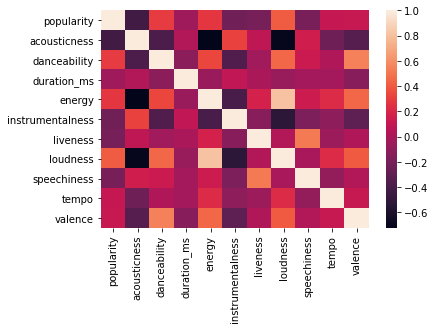

In [10]:
ax = sns.heatmap(data=data.corr())

C:\Users\vaishnavi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

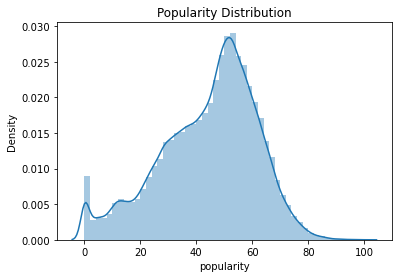

In [11]:
#target value is popularity
sns.distplot(data['popularity']).set_title('Popularity Distribution')

In [12]:
#as we see on the graph max. denisty rises after 50, thus making popularity into binary value
data.loc[data['popularity'] < 50, 'popularity'] = 0 
data.loc[data['popularity'] >= 50, 'popularity'] = 1
data.loc[data['popularity'] == 1]

genre      artist_name  \
242     Alternative             Joji   
243     Alternative         YUNGBLUD   
244     Alternative           H.E.R.   
245     Alternative             Joji   
246     Alternative           H.E.R.   
...             ...              ...   
224310        Opera  Giacomo Puccini   
224315        Opera   Giuseppe Verdi   
226968   Soundtrack     Yann Tiersen   
227129   Soundtrack     Yann Tiersen   
227262   Soundtrack      Max Richter   

                                          track_name                track_id  \
242                         SLOW DANCING IN THE DARK  0rKtyWc8bvkriBthvHKY8d   
243     11 Minutes (with Halsey feat. Travis Barker)  4mGdjNMo0RonTlOEb7cYg4   
244                  Best Part (feat. Daniel Caesar)  4OBZT9EnhYIV17t4pGw7ig   
245                                       YEAH RIGHT  1VGzxJnVQND7Cg5H5wGj14   
246              Could've Been (feat. Bryson Tiller)  6lzLjIOyWTyTJvk0jraYee   
...                                              ...                     ...   
224310            Turandot, Atto III: "Nessun Dorma"  25hkRq63EvIcVsG4RK7Ljz   
224315          Rigoletto / Act 1: "Questa o quella"  6PX500Lh9Vrh19ENdxqaXr   
226968                            On the Wire - Edit  5rqxRqTz00WVcx7nj7zy2D   
227129                                       Banquet  1JTV5hoIxCsPfj63T52TBw   
227262                            Written On The Sky  2ffwBvpsQhgXyU7zBUOhwP   

        popularity  acousticness  danceability  duration_ms  energy  \
242              1        0.5440         0.515       209274  0.4790   
243              1        0.0116         0.464       239507  0.8520   
244              1        0.7950         0.473       209400  0.3710   
245              1        0.6190         0.672       174358  0.5880   
246              1        0.6400         0.545       248467  0.3300   
...            ...           ...           ...          ...     ...   
224310           1        0.9700         0.196       190293  0.2750   
224315           1        0.9390         0.527       119000  0.1940   
226968           1        0.9930         0.491       263707  0.0423   
227129           1        0.8500         0.535        92627  0.4270   
227262           1        0.9930         0.349       100013  0.1190   

        instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
242             0.005980  D#    0.1910    -7.458  Major       0.0261   88.964   
243             0.000000   B    0.1080    -3.804  Major       0.0670  160.075   
244             0.000000   E    0.1090   -10.219  Minor       0.0405   75.208   
245             0.241000  C#    0.0992    -9.573  Major       0.1330  169.033   
246             0.000007  C#    0.2200   -11.719  Minor       0.1640  103.553   
...                  ...  ..       ...       ...    ...          ...      ...   
224310          0.468000   D    0.0908   -14.796  Major       0.0405   82.348   
224315          0.004460  G#    0.0470   -17.578  Major       0.0474  107.083   
226968          0.928000   E    0.1330   -18.236  Minor       0.0923   99.009   
227129          0.013400   E    0.1180   -12.620  Minor       0.0344  116.537   
227262          0.906000  A#    0.1030   -25.234  Minor       0.0482  136.278   

       time_signature  valence  
242               4/4    0.284  
243               4/4    0.233  
244               4/4    0.413  
245               4/4    0.204  
246               4/4    0.399  
...               ...      ...  
224310            4/4    0.102  
224315            4/4    0.566  
226968            4/4    0.213  
227129            4/4    0.585  
227262            3/4    0.181  

[100951 rows x 18 columns]

In [13]:
#checking for duplicate value

In [14]:
boolean = data['track_name'].duplicated().any() 
boolean #As boolean is true there is duplicate values

True

In [15]:
data = pd.DataFrame(data,
                  columns = ['artist_name','track_name', 'popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','mode','key','time_signature','speechiness','tempo','valence'])
duplicate = data[data.duplicated()]
duplicate

artist_name                                     track_name  \
3467     Scissor Sisters                                 Take Your Mama   
4139           The Hives                      Hate To Say I Told You So   
4144         of Montreal                                Gronlandic Edit   
4177       Janelle Monáe  I Like That - Recorded at Spotify Studios NYC   
4209         Passion Pit                                 Little Secrets   
...                  ...                                            ...   
228114       Alan Menken                                   Meg's Garden   
228117       Alan Menken                                     The Plague   
228145  Ryuichi Sakamoto                                            Oto   
228148      Joe Hisaishi                                  GHIBLI MEDLEY   
228150      Philip Glass                                Metamorphosis 1   

        popularity  acousticness  danceability  duration_ms   energy  \
3467             1       0.22000         0.762       271907  0.95400   
4139             1       0.00109         0.451       199760  0.92900   
4144             1       0.08330         0.971       204760  0.40000   
4177             1       0.28500         0.522       180551  0.52700   
4209             1       0.00345         0.597       238973  0.78600   
...            ...           ...           ...          ...      ...   
228114           0       0.97400         0.155        74493  0.07530   
228117           0       0.94200         0.182        51773  0.04130   
228145           0       0.94700         0.184       229933  0.10400   
228148           0       0.95100         0.273       487667  0.12800   
228150           0       0.97900         0.272       387490  0.00107   

        instrumentalness  liveness  loudness   mode key time_signature  \
3467            0.000018    0.0612    -4.542  Major  G#            4/4   
4139            0.007850    0.4420    -5.021  Major   F            4/4   
4144            0.000661    0.1080    -7.154  Minor   E            4/4   
4177            0.000002    0.1840    -7.358  Major   C            4/4   
4209            0.000000    0.0909    -4.248  Major   F            4/4   
...                  ...       ...       ...    ...  ..            ...   
228114          0.854000    0.1080   -22.275  Major   C            5/4   
228117          0.921000    0.1090   -27.438  Major  D#            5/4   
228145          0.946000    0.0989   -23.917  Minor  C#            3/4   
228148          0.928000    0.1270   -17.724  Minor   C            4/4   
228150          0.902000    0.0762   -29.463  Major   C            3/4   

        speechiness    tempo  valence  
3467         0.1210  153.960   0.9330  
4139         0.0549  135.767   0.3780  
4144         0.0487  119.953   0.6520  
4177         0.0631  130.323   0.4260  
4209         0.0419   99.888   0.6660  
...             ...      ...      ...  
228114       0.0375  141.599   0.0536  
228117       0.0410   70.899   0.0664  
228145       0.0457   80.063   0.1370  
228148       0.0358  109.163   0.1180  
228150       0.0572   65.720   0.0660  

[74263 rows x 16 columns]

In [16]:
#we can see duplicate values
data[data['track_name']=='Oto']

artist_name track_name  popularity  acousticness  danceability  \
84288   Ryuichi Sakamoto        Oto           0         0.947         0.184   
202964  Ryuichi Sakamoto        Oto           0         0.947         0.184   
228145  Ryuichi Sakamoto        Oto           0         0.947         0.184   

        duration_ms  energy  instrumentalness  liveness  loudness   mode key  \
84288        229933   0.104             0.946    0.0989   -23.917  Minor  C#   
202964       229933   0.104             0.946    0.0989   -23.917  Minor  C#   
228145       229933   0.104             0.946    0.0989   -23.917  Minor  C#   

       time_signature  speechiness   tempo  valence  
84288             3/4       0.0457  80.063    0.137  
202964            3/4       0.0457  80.063    0.137  
228145            3/4       0.0457  80.063    0.137

In [17]:
data[data['track_name']=="Meg's Garden"]

artist_name    track_name  popularity  acousticness  danceability  \
205661  Alan Menken  Meg's Garden           0         0.974         0.155   
228114  Alan Menken  Meg's Garden           0         0.974         0.155   

        duration_ms  energy  instrumentalness  liveness  loudness   mode key  \
205661        74493  0.0753             0.854     0.108   -22.275  Major   C   
228114        74493  0.0753             0.854     0.108   -22.275  Major   C   

       time_signature  speechiness    tempo  valence  
205661            5/4       0.0375  141.599   0.0536  
228114            5/4       0.0375  141.599   0.0536

In [18]:
#droping duplicate values
data.drop_duplicates('track_name',inplace = True)

In [19]:
boolean = data['track_name'].duplicated().any() 
boolean #As boolean is false, there is no duplicate value

False

In [20]:
data['popularity'].unique()

array([0, 1], dtype=int64)

In [21]:
#converting charater values to numerical value
#df.loc[df['First Season'] > 1990, 'First Season'] = 1
data.loc[data['mode'] == 'Major','mode'] = 1
data.loc[data['mode'] == 'Minor','mode'] = 0
list_of_keys = data['key'].unique()
for i in range(len(list_of_keys)):
    data.loc[data['key'] == list_of_keys[i], 'key'] = i
list_of_time_signatures = data['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    data.loc[data['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
data.sample(5)

artist_name                          track_name  popularity  \
112081             Darell                           Vamo Alla           1   
7174    Foster The People  Sit Next to Me - Stereotypes Remix           1   
151695       Cody Johnson                 Never Go Home Again           1   
130528      Alexis y Fido                 Donde Estés Llegaré           1   
119341        Tommy Ryman                Divorce and Lesbians           0   

        acousticness  danceability  duration_ms  energy  instrumentalness  \
112081        0.2420         0.863       237227   0.748          0.000273   
7174          0.1730         0.680       190720   0.738          0.000360   
151695        0.4340         0.429       252147   0.675          0.000000   
130528        0.0661         0.829       228813   0.904          0.000002   
119341        0.8960         0.674       151144   0.582          0.000000   

        liveness  loudness mode key time_signature  speechiness    tempo  \
112081     0.116    -4.480    0   7              0       0.1780   89.958   
7174       0.370    -4.881    0   5              0       0.0331  105.015   
151695     0.186    -5.296    0   9              0       0.0463  168.003   
130528     0.343    -3.510    0   7              0       0.0535   94.021   
119341     0.794    -8.378    0   3              0       0.9240   77.215   

        valence  
112081    0.838  
7174      0.675  
151695    0.418  
130528    0.595  
119341    0.681

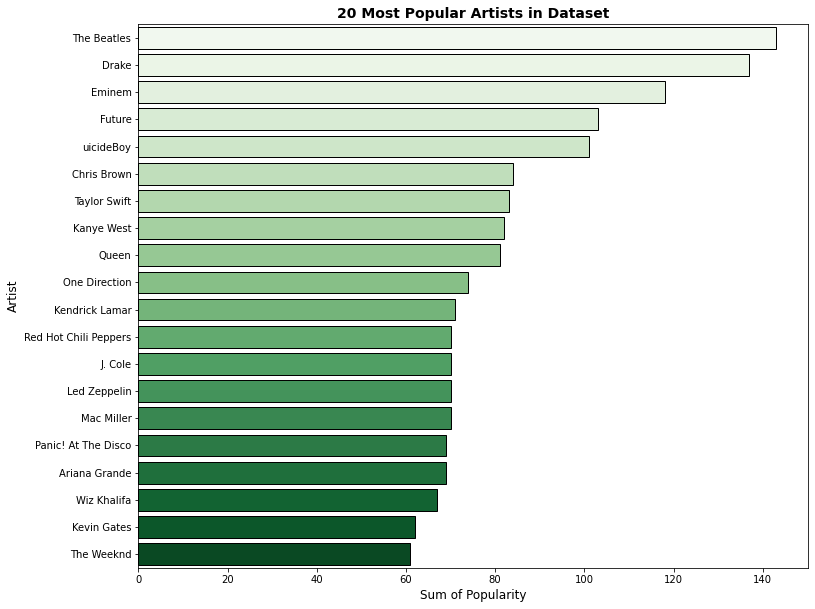

In [22]:
# # Plotting
df=data
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('artist_name')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Greens", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', fontsize=12)
ax.set_ylabel('Artist', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset', fontsize=14, weight = 'bold')
plt.show()

C:\Users\vaishnavi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


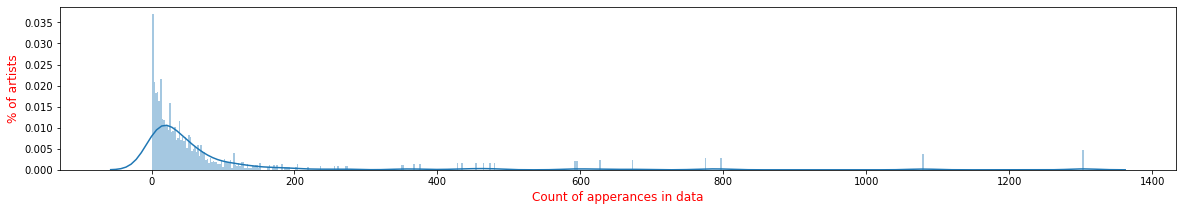

In [23]:
df['mean'] = df.groupby('artist_name')['popularity'].transform('mean')
df['count'] = df.groupby('artist_name')['popularity'].transform('count')
# plotting
fig, ax = plt.subplots(figsize = (20, 3))
ax = sns.distplot(df['count'], bins = 600)
ax.set_xlabel('Count of apperances in data', fontsize=12, color='r')
ax.set_ylabel('% of artists', fontsize=12, color='r')
plt.show()

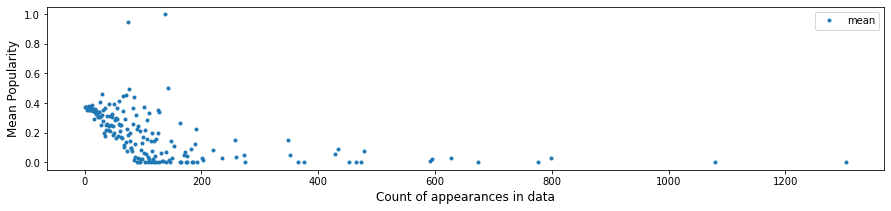

In [24]:
fig, ax = plt.subplots(figsize = (15, 3))
stat = df.groupby('count')['mean'].mean().to_frame().reset_index()
ax = stat.plot(x='count', y='mean', marker='.', linestyle = '', ax=ax)
ax.set_xlabel('Count of appearances in data', fontsize=12)
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.show()

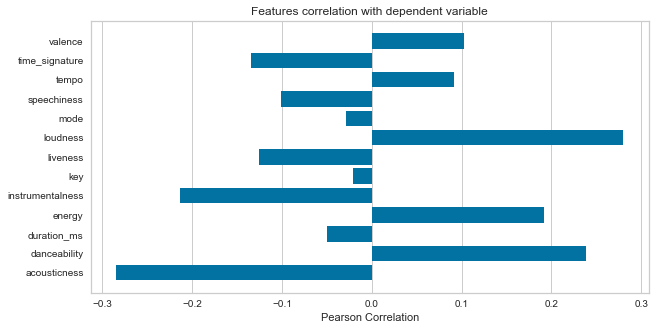

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [25]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(10,5)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

# ---------------------------------------------------------------------------------------------------------------

# Content Based Recomendation

# Model 1: Naive Bayes

In [26]:
#Using Naive Bayes to predict if the song will be popular based on popularity feature in the dataset
#so the target "y" = "popularity"
#Since we are using a content based approach here we will drop other columns like 'artist_name','track_name' and 'count' 

X_NB = data.drop(['popularity','artist_name','track_name','count'], axis=1).to_numpy()
y_NB = data['popularity'].copy()

X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X_NB, y_NB, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

#normalize 
scaler = StandardScaler()
scaler.fit(X_train_NB)
    
X_train_NB = scaler.transform(X_train_NB)
X_test_NB = scaler.transform(X_test_NB)

In [28]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train_NB, y_train_NB)
y_pred_NB = clf.predict(X_test_NB)

from sklearn import metrics
NB_acc = accuracy_score(y_test_NB, y_pred_NB)

In [55]:
print('NB_accuracy: ', NB_acc)

NB_accuracy:  0.7150589228820391


# Model 2: Stochastic Gradient Descent (SGD)

In [29]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
cv = GridSearchCV(sgd, param_grid, n_jobs=-1,verbose =1)
result = cv.fit(X_train_NB, y_train_NB)

print('\noptimal learning rate = {}'.format(result.best_params_))

model = result.best_estimator_


y_pred_sgd = model.predict(X_test_NB)
sgd_acc = accuracy_score(y_test_NB, y_pred_sgd)
print('\nsgd accuracy: {}'.format(sgd_acc))


Fitting 5 folds for each of 7 candidates, totalling 35 fits

optimal learning rate = {'alpha': 0.001}

sgd accuracy: 0.8866454262792215


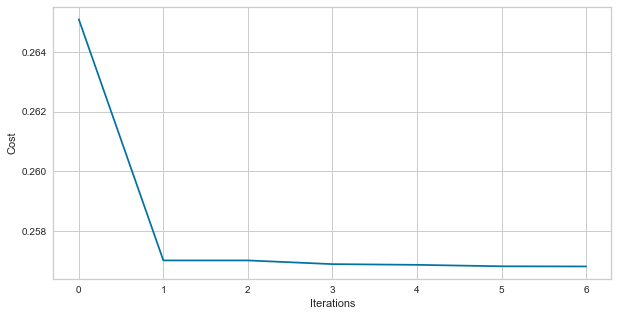

In [30]:
import sys
from io import StringIO
import io

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

sgd = SGDClassifier(max_iter=1000,alpha=0.01,verbose=2)

sgd.fit(X_train_NB, y_train_NB)

sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []

for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
    
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


# Popularity Based recommendation

# Using Cosine Similarity to get the similarity between popular songs
$$ cosine(x,y) = \frac{x\cdot y^T}{||x||\cdot ||y||}  $$

In [31]:
data_new = data.drop(['artist_name','track_name','count'], axis=1)
train, test = train_test_split(data_new, test_size=0.2, random_state=42)

test = test.drop(['popularity'], axis=1).to_numpy()

liked_songs = train.loc[train['popularity'] == 1].drop(['popularity'], axis=1)
disliked_songs = train.loc[train['popularity'] == 0].drop(['popularity'], axis=1)

liked_songs_id = liked_songs.index
disliked_songs_id = disliked_songs.index

def normalize_2(arr):
    cols_mean, cols_stdev = arr.mean(axis=0), arr.std(axis=0)
    output = (arr - cols_mean) / cols_stdev
    return output

def get_track_features(idx_arr):
    track_features = []
    for idx in idx_arr:
        if idx in liked_songs_id:
            track = normalize_2(liked_songs.loc[idx].to_numpy())
        elif idx in disliked_songs_id:
            track = normalize_2(disliked_songs.loc[idx].to_numpy())
        
        if len(track) > 0:
            track_features.append(track)
    return np.array(track_features)

user_favorites = get_track_features(liked_songs_id)
user_dislikes = get_track_features(disliked_songs_id)

print('no. of popular songs: {0}\nno. of unpopular: {1}\n'.format(len(user_favorites), len(user_dislikes)))

from numpy import linalg as LA

fav_mean = user_favorites.mean(axis=0)

def top_5(tracks):
    cosine_similarities = [np.dot(fav_mean, sample)/(LA.norm(fav_mean)*LA.norm(sample)) for sample in tracks]
    zipped_similarities = zip(cosine_similarities, enumerate(tracks))
    sorted_similarities = sorted(zipped_similarities, reverse=True, key = lambda x: x[0])
    
    return [(idx,_similarity) for _similarity,(idx,_features) in sorted_similarities[0:5]]
        
print('Top 5 new tracks for user with their similatirity to popular songs : \n{}'.format(top_5(test)))

no. of popular songs: 27905
no. of unpopular: 76298

Top 5 new tracks for user with their similatirity to popular songs : 
[(14357, 0.9636230580643447), (9750, 0.9636230519011579), (24825, 0.9636226086400075), (23181, 0.9636223478993748), (15950, 0.96362226557032)]


# Here we are recommending top 5 popular songs from new unseen data based on the similarity of these tracks to the existing popular tracks.

In [32]:
top_5_songs = top_5(test)
c=1
print('Top 5 new tracks for users with their similatirity to popular songs : \n')
for song in top_5_songs:
    id = song[0]
    print('{0}. {1}\n'.format(c, data.loc[data.index[id]]['track_name']))
    c = c+1

Top 5 new tracks for users with their similatirity to popular songs : 

1. Powers

2. On And On

3. Two Tickets to Paradise

4. Tricks on Me

5. I Wanna Love You - Album Version (Edited)



In [33]:
features = ['acousticness','danceability','duration_ms','energy', 'instrumentalness','liveness','loudness','speechiness','tempo','valence']
#training = data.sample(frac = 0.8,random_state = 420)
X_train = data[features]
y_train = data['popularity']
#X_test = data.drop(training.index)[features]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [35]:
#Supervised Learning with Target = popularity

In [37]:
#decision tree
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_test, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.6845034739549346
AUC: 0.6048434106704231


In [38]:
#random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)
RandomForest_Predict = RandomForest.predict(X_test)
RandomForest_Accuracy = accuracy_score(y_test, RandomForest_Predict)
print("Accuracy: " + str(RandomForest_Accuracy))


Accuracy: 0.7560938159763541


In [39]:
#Knn
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_test, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.6836589766227784
AUC: 0.5401286927103472


In [40]:
#XGBoost
XGB_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_Model.fit(X_train, y_train)
XGB_Predict = XGB_Model.predict(X_test)
XGB_Accuracy = accuracy_score(y_test, XGB_Predict)
print("Accuracy: " + str(XGB_Accuracy))

XGB_AUC = roc_auc_score(y_test, XGB_Predict) 
print("AUC: " + str(XGB_AUC))

[18:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vaishnavi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.751487466891866
AUC: 0.5842671119770106


In [56]:
model_performance_accuracy = pd.DataFrame({'Model': [ 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'XGBClassifier',
                                                        'NaiveBayes',
                                                        'SGDClassifier'],
                                            'Accuracy': [
                                                         RandomForest_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         XGB_Accuracy,
                                                        NB_acc,
                                            sgd_acc],
                                      
                                             'F1_Score': [f1_score(y_test, RandomForest_Predict),
                                                         f1_score(y_test, KNN_Predict),
                                                           f1_score(y_test, DT_Predict),
                                                            f1_score(y_test, XGB_Predict),
                                                            f1_score(y_test_NB, y_pred_NB),
                                                            f1_score(y_test_NB, y_pred_sgd) ] })

In [57]:
model_performance_accuracy.sort_values(by="Accuracy", ascending=False)

Model  Accuracy  F1_Score
5           SGDClassifier  0.886645  0.778519
0  RandomForestClassifier  0.756094  0.409040
3           XGBClassifier  0.751487  0.324076
4              NaiveBayes  0.715059  0.626741
2  DecisionTreeClassifier  0.684503  0.424963
1    KNeighborsClassifier  0.683659  0.280199

# Training model with unsupervised algorithm (Kmeans)

In [45]:
features = ['popularity','acousticness','danceability','duration_ms','energy',
           'instrumentalness','liveness','loudness','speechiness','tempo','valence']

# Applying PCA to reduce the dimensionality of the dataset

In [46]:
X = data.iloc[:,2:]
pca = PCA(n_components=5)
pca.fit(X)
X = pca.transform(X)
pca.fit_transform(X)
X.shape

(130254, 5)

In [49]:
#Normalizing the data
X_norm = StandardScaler().fit_transform(X)
X_norm[:5]

array([[-0.60514887,  1.50625156, -1.13390194,  1.77908015, -1.11861132,
        -0.54693516, -0.61781558, -0.54382436, -0.38026913, -0.95493173,
        -1.28711284],
       [-0.60514887,  1.46865786, -0.89422598, -0.4530641 , -1.22553002,
        -0.46354314, -0.45155672, -1.3559171 , -0.36489403,  0.51239397,
        -0.24700927],
       [-0.60514887,  1.36930309, -1.87332777,  0.18222318, -0.26682568,
        -0.48653198,  0.5932394 ,  0.32209331, -0.45443142, -1.30336432,
        -1.35759061],
       [-0.60514887,  1.43911996, -1.45516971,  0.34134528, -1.92032337,
        -0.54823887, -0.51061041, -3.3682319 , -0.41056714, -1.25956594,
        -1.47480628],
       [-0.60514887,  1.5035663 , -2.00591447,  2.76621426, -1.73517582,
        -0.10661114, -0.61554428, -1.9208576 , -0.40468842,  1.83041431,
        -1.4740644 ]])

In [50]:
pca = PCA(n_components=2).fit(X_norm)
X_pca = pca.transform(X_norm)
X.shape, X_pca.shape

((130254, 11), (130254, 2))

# hyper-parameter tuning for optimal number of clusters

In [51]:
#hyper-parameter tuning for optimal number of clusters
scores = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_, metric='euclidean')
    print(k, score)

2 0.5318033455283449
3 0.6071341732532628
4 0.47959559062885365
5 0.40899868126036193
6 0.42096134978323435
7 0.38734372247613125
8 0.3895312489645785
9 0.3613776634560728


In [52]:
#Got highest score when cluster = 3
kmeans = KMeans(n_clusters=3, random_state=7)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=7)

In [53]:
#Output
data['Labels'] = kmeans.labels_
data.head()

artist_name                                         track_name  \
0   Giuseppe Verdi  Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1  Giacomo Puccini  Madama Butterfly / Act 1: ... E soffitto e pareti   
2  Giacomo Puccini      Turandot / Act 2: Gloria, gloria, o vincitore   
3   Giuseppe Verdi       Rigoletto, Act IV: Venti scudi hai tu detto?   
4   Giuseppe Verdi           Don Carlo / Act 4: "Ella giammai m'amò!"   

   popularity  acousticness  danceability  duration_ms   energy  \
0           0         0.986         0.313       490867  0.23100   
1           0         0.972         0.360       176797  0.20100   
2           0         0.935         0.168       266184  0.47000   
3           0         0.961         0.250       288573  0.00605   
4           0         0.985         0.142       629760  0.05800   

   instrumentalness  liveness  loudness mode key time_signature  speechiness  \
0          0.000431    0.0964   -14.287    1   0              0       0.0547   
1          0.028000    0.1330   -19.794    1   1              0       0.0581   
2          0.020400    0.3630    -8.415    1   2              1       0.0383   
3          0.000000    0.1200   -33.440    1   3              0       0.0480   
4          0.146000    0.0969   -23.625    1   3              0       0.0493   

     tempo  valence      mean  count  Labels  
0   86.001   0.0886  0.001534   1304       1  
1  131.798   0.3690  0.002780   1079       1  
2   75.126   0.0696  0.002780   1079       1  
3   76.493   0.0380  0.001534   1304       1  
4  172.935   0.0382  0.001534   1304       1

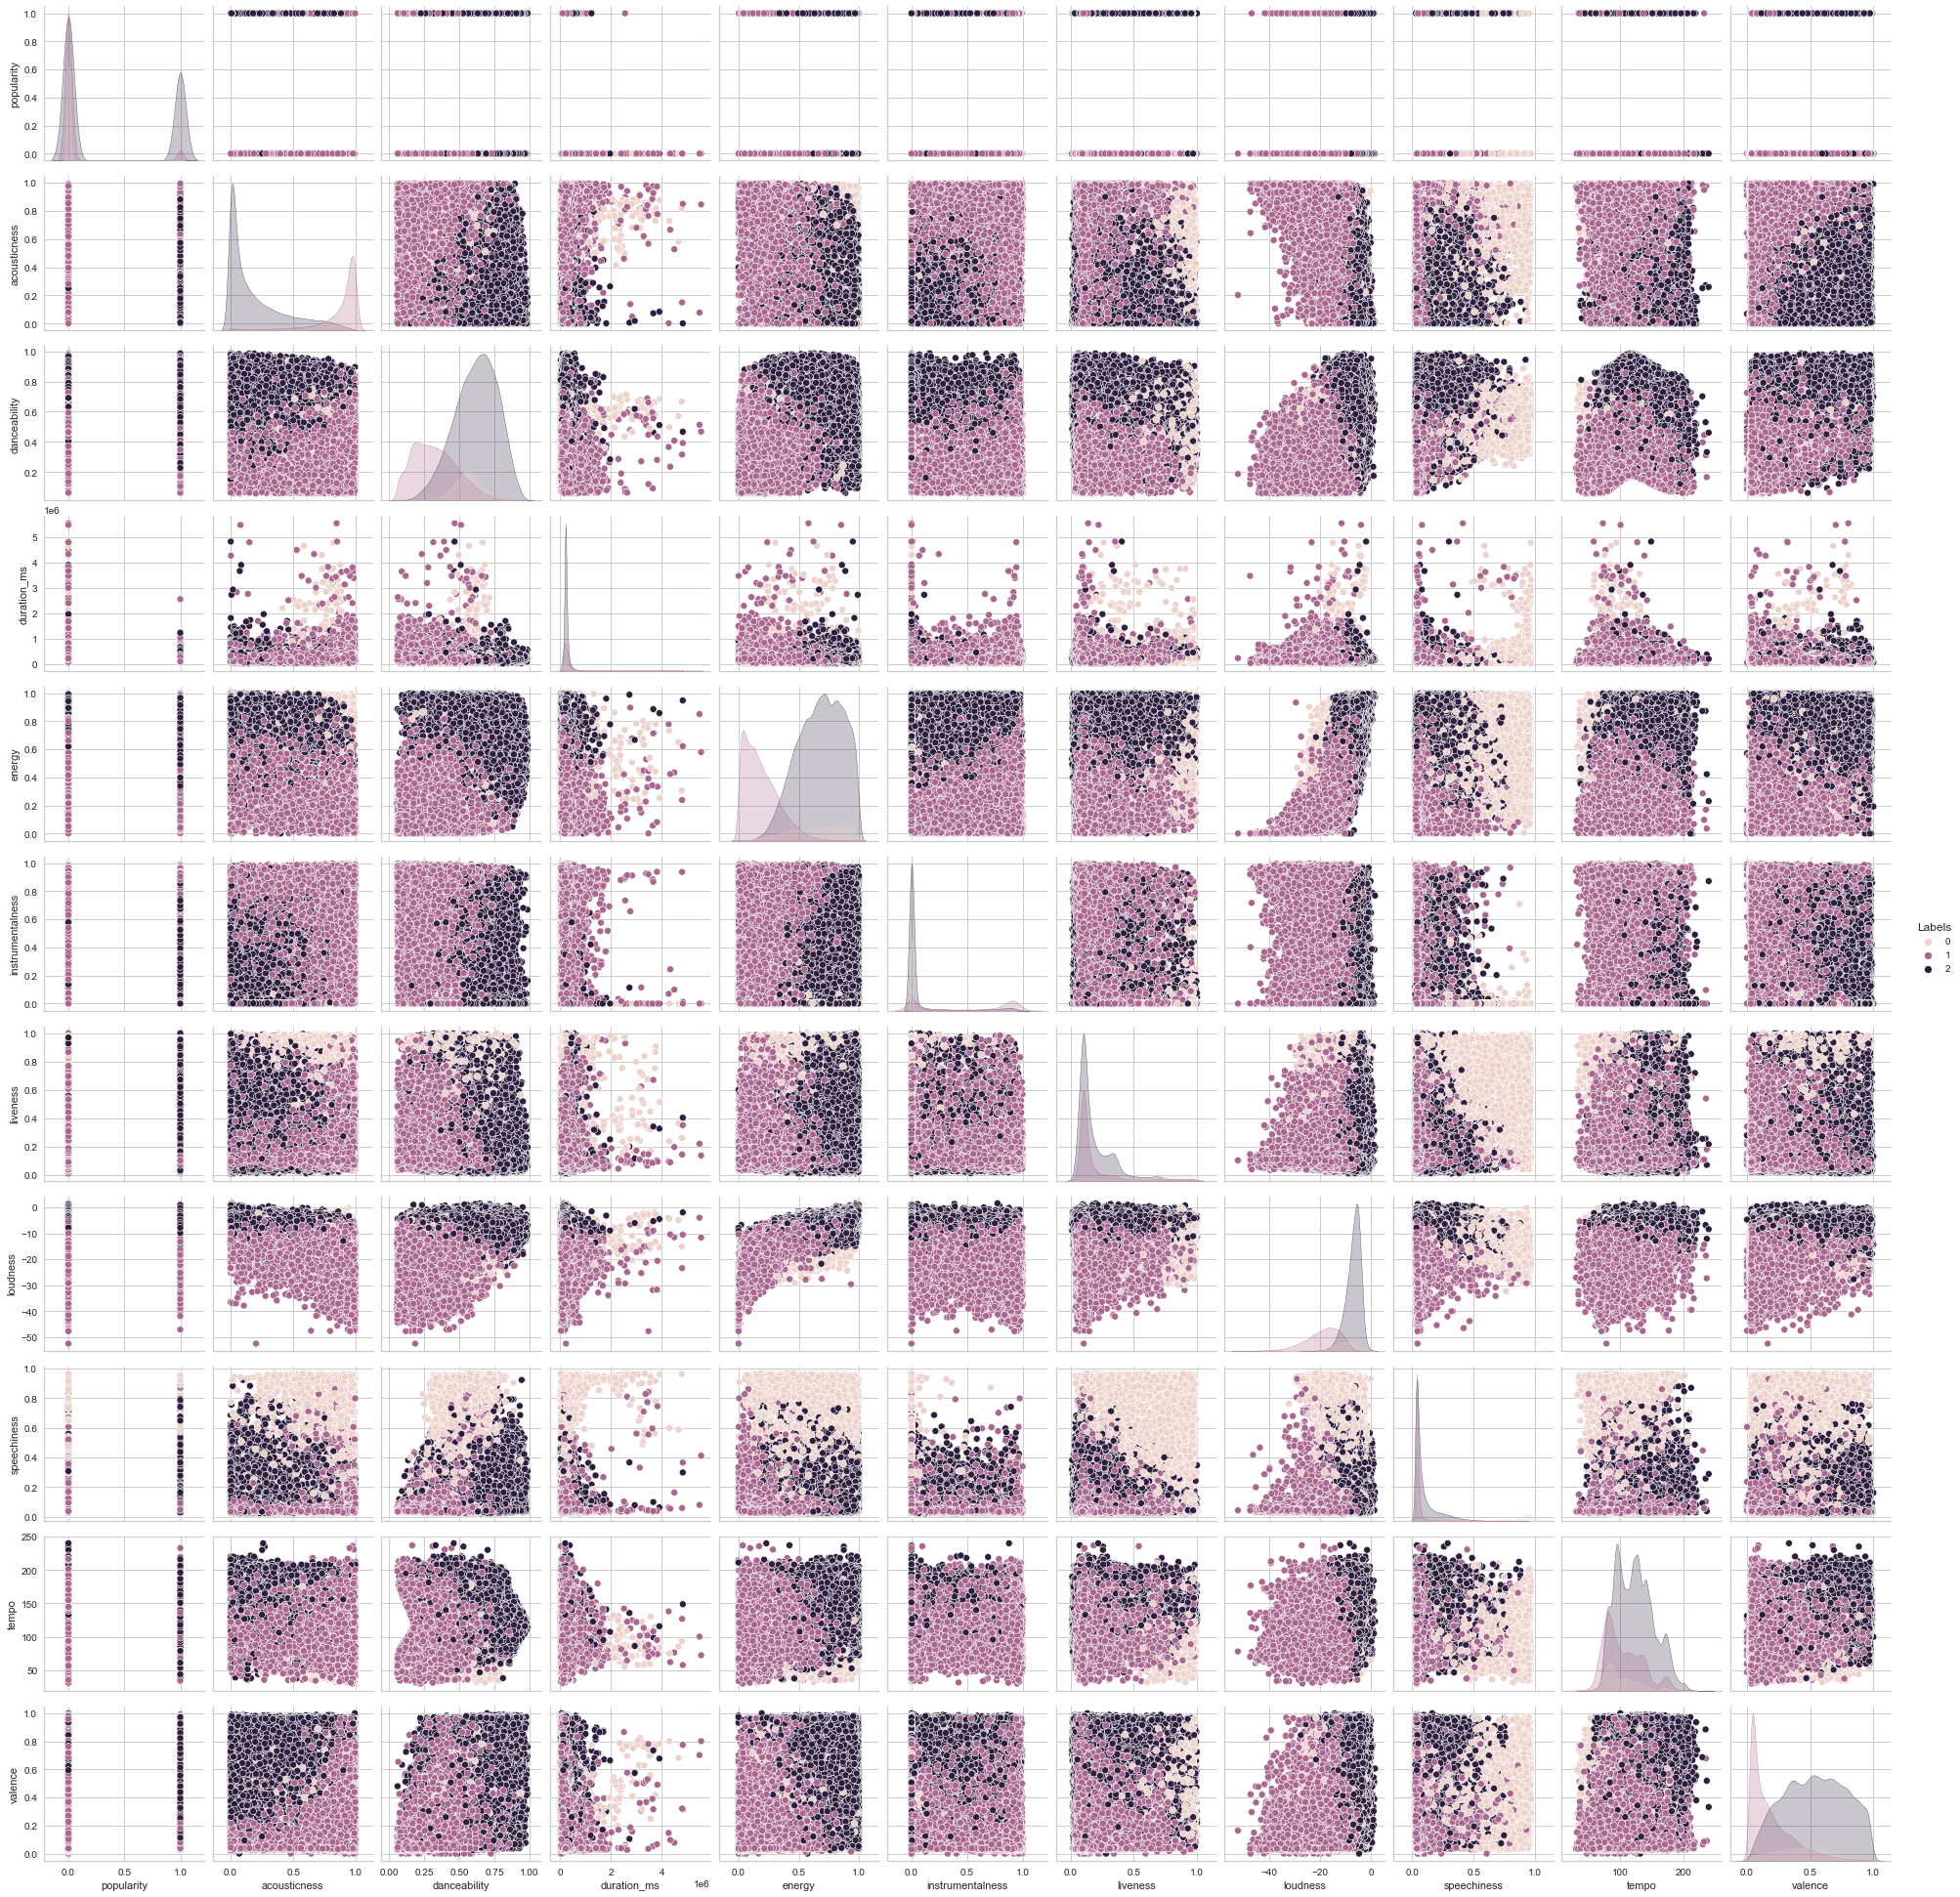

In [54]:
plot = sns.pairplot(data[features + ['Labels']], hue='Labels')
plot.savefig('pairplot_kmeans.jpg')